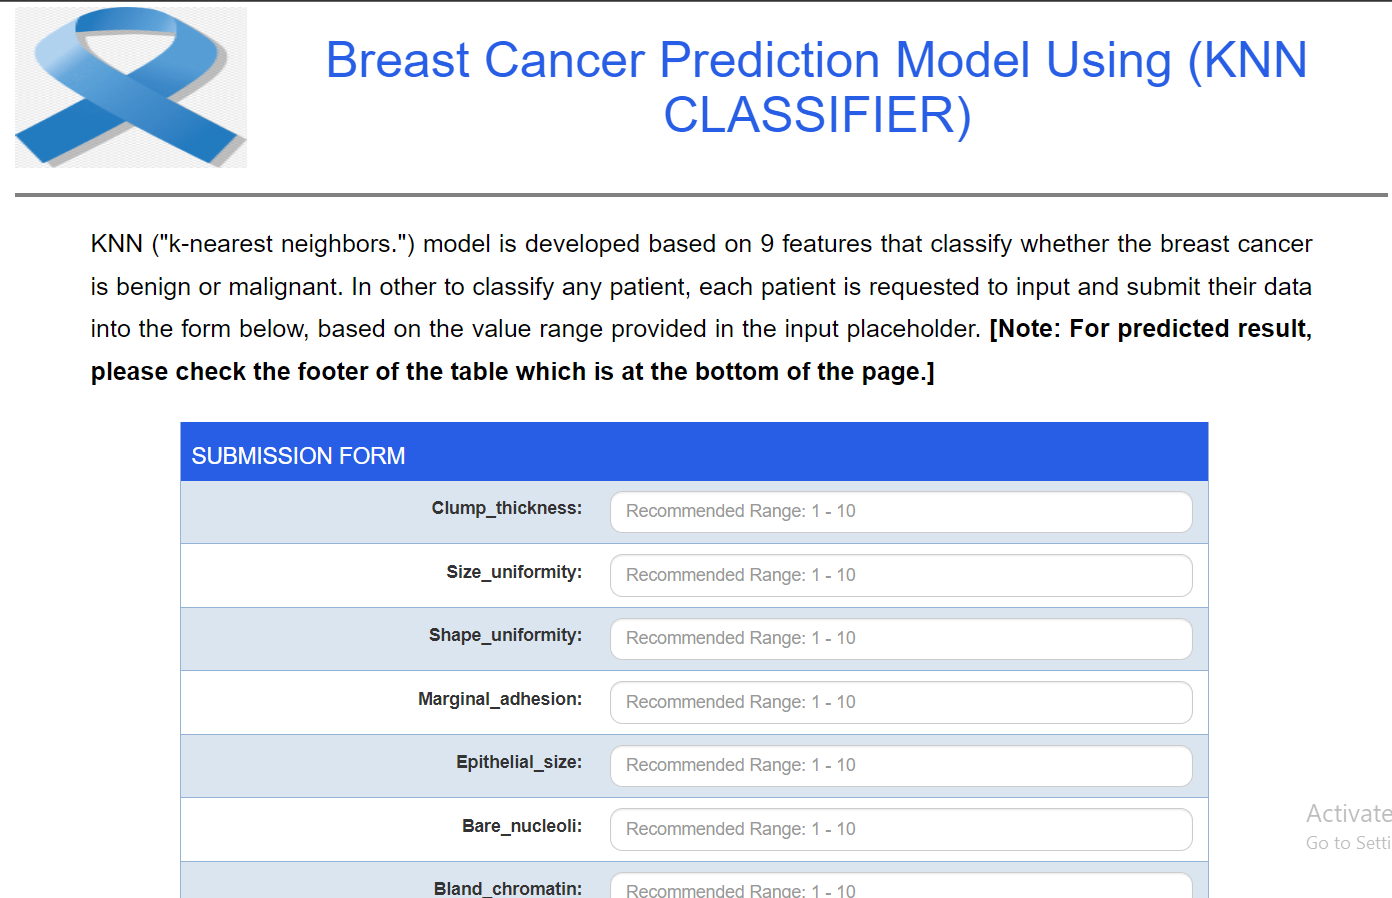

Breast cancer is a prevalent and significant public health issue among women worldwide. Accurate early diagnosis plays a vital role in improving prognosis and survival rates. In addition, precise classification of breast tumors as benign or malignant is crucial for avoiding unnecessary treatments.

Using Python and data analysis techniques, we can leverage machine learning algorithms such as K-Nearest Neighbors (KNN) to aid in the early diagnosis and classification of breast cancer. KNN is a powerful algorithm that can analyze medical data and clinical variables to make accurate predictions.

 Flask application was also used to deploy the breast cancer diagnosis and classification model, allowing healthcare professionals to access it conveniently. The Flask framework provides a user-friendly interface, enabling seamless interaction with the machine learning model.

Through this application, healthcare professionals can input relevant patient data, and the KNN algorithm implemented in Python will provide predictions regarding the presence of breast cancer and the classification of tumors as benign or malignant. This empowers medical practitioners to make informed decisions about timely clinical treatments, reducing unnecessary interventions for patients with benign tumors.

By combining the power of Python, data analysis, KNN, and Flask deployment, we can contribute to improving breast cancer diagnosis and classification, ultimately leading to better patient outcomes and more efficient allocation of healthcare resources.


**Benign**: Not likely to get cancer (2)

**Malignant**: Likely to get cancer (4)




In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [329]:
data=pd.read_csv("/content/breastCancer.csv")
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [330]:
data['class'].unique()

array([2, 4])

In [331]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

**We can change the vlaues 2 and 4 to 0 and 1 respectively**

In [332]:
data['class'] = data['class'].replace(2,0)

In [333]:
data['class'] = data['class'].replace(4,1)

In [334]:
data['class'].unique()

array([0, 1])

In [335]:
data['clump_thickness'].min()

1

In [336]:
data['clump_thickness'].max()

10

**Attribute Information:**

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (0 for benign, 1 for malignant)

##**Exploratory Data Analysis**

In [337]:

data['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

In [338]:
data.dtypes #checking the data types of each column

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [339]:

data['bare_nucleoli'] #let's inspect the 'bare_nucleoli' column

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [340]:
data['bare_nucleoli'].isna().sum()

0

In [341]:
data[data['bare_nucleoli']=='?'] #checking the presence of '?' in the 'bare_nucleoli' column, this is becuase we already know it contains '?'

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,1
40,1096800,6,6,6,9,6,?,7,8,1,0
139,1183246,1,1,1,1,1,?,2,1,1,0
145,1184840,1,1,3,1,2,?,2,1,1,0
158,1193683,1,1,2,1,3,?,1,1,1,0
164,1197510,5,1,1,1,2,?,3,1,1,0
235,1241232,3,1,4,1,2,?,3,1,1,0
249,169356,3,1,1,1,2,?,3,1,1,0
275,432809,3,1,3,1,2,?,2,1,1,0
292,563649,8,8,8,1,2,?,6,10,1,1


In [342]:
data[data['bare_nucleoli']=='?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                               2
dtype: object

###**Alternatively**

The best practice is to use the isdigit() function, because it is likely we will not know the character in the column.

In [343]:
digits_in_bare_nucleoli= pd.DataFrame(data.bare_nucleoli.str.isdigit())
digits_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [344]:
#Here we use the "==False" so that the characters can be seen

data[digits_in_bare_nucleoli['bare_nucleoli']== False]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,1
40,1096800,6,6,6,9,6,?,7,8,1,0
139,1183246,1,1,1,1,1,?,2,1,1,0
145,1184840,1,1,3,1,2,?,2,1,1,0
158,1193683,1,1,2,1,3,?,1,1,1,0
164,1197510,5,1,1,1,2,?,3,1,1,0
235,1241232,3,1,4,1,2,?,3,1,1,0
249,169356,3,1,1,1,2,?,3,1,1,0
275,432809,3,1,3,1,2,?,2,1,1,0
292,563649,8,8,8,1,2,?,6,10,1,1


Let us replace these missing values with NaN

In [345]:
df= data.replace('?', np.nan)

In [346]:
df.isna().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

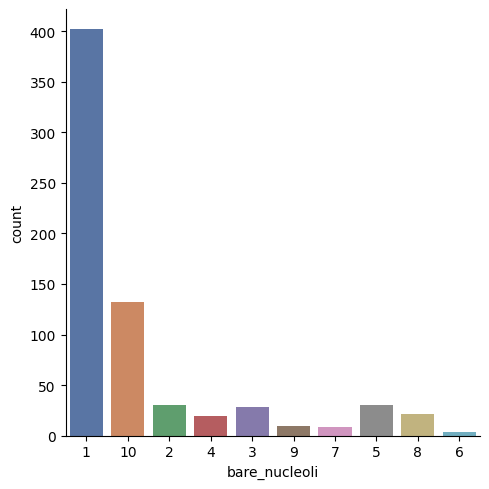

In [347]:
sns.catplot(x="bare_nucleoli", kind="count", palette="deep", data=df)

We will not drop the **NaN**'s in our dataset, rather we will replace them with the **Median** of the column. We can also use the **Mode**(i.e. the most frequent number in the column). We did not replace the **NaN**'s with **Mean** becuase in this case, the data is not normally distributed. It is skewed to the right.

In [348]:

df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      0.0
dtype: float64

In [349]:

df= df.fillna(df.median())

In [350]:

df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

We observed that the **bare_nucleoli** feature is showing **object**, although it is supposed to be integer. We will then manually convert it to integer.

In [351]:

df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [352]:

df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [353]:
#dropping the index of the dataset

df.drop('id', axis=1, inplace=True)

In [354]:

df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


###Univariate Data Analysis of the **Class** column

<ipython-input-355-42c743b4599b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'])


<Axes: xlabel='class', ylabel='Density'>

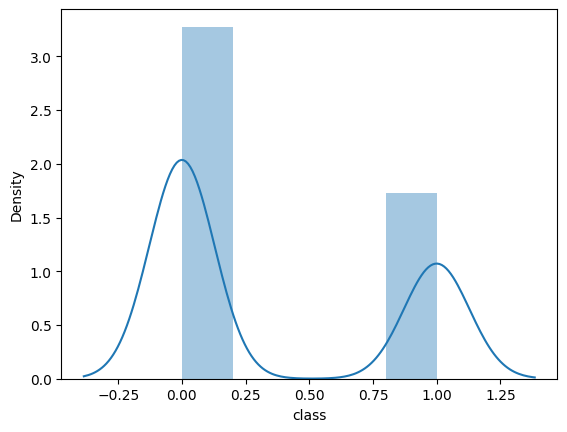

In [355]:
sns.distplot(df['class'])

###Multivariate Data Analysis

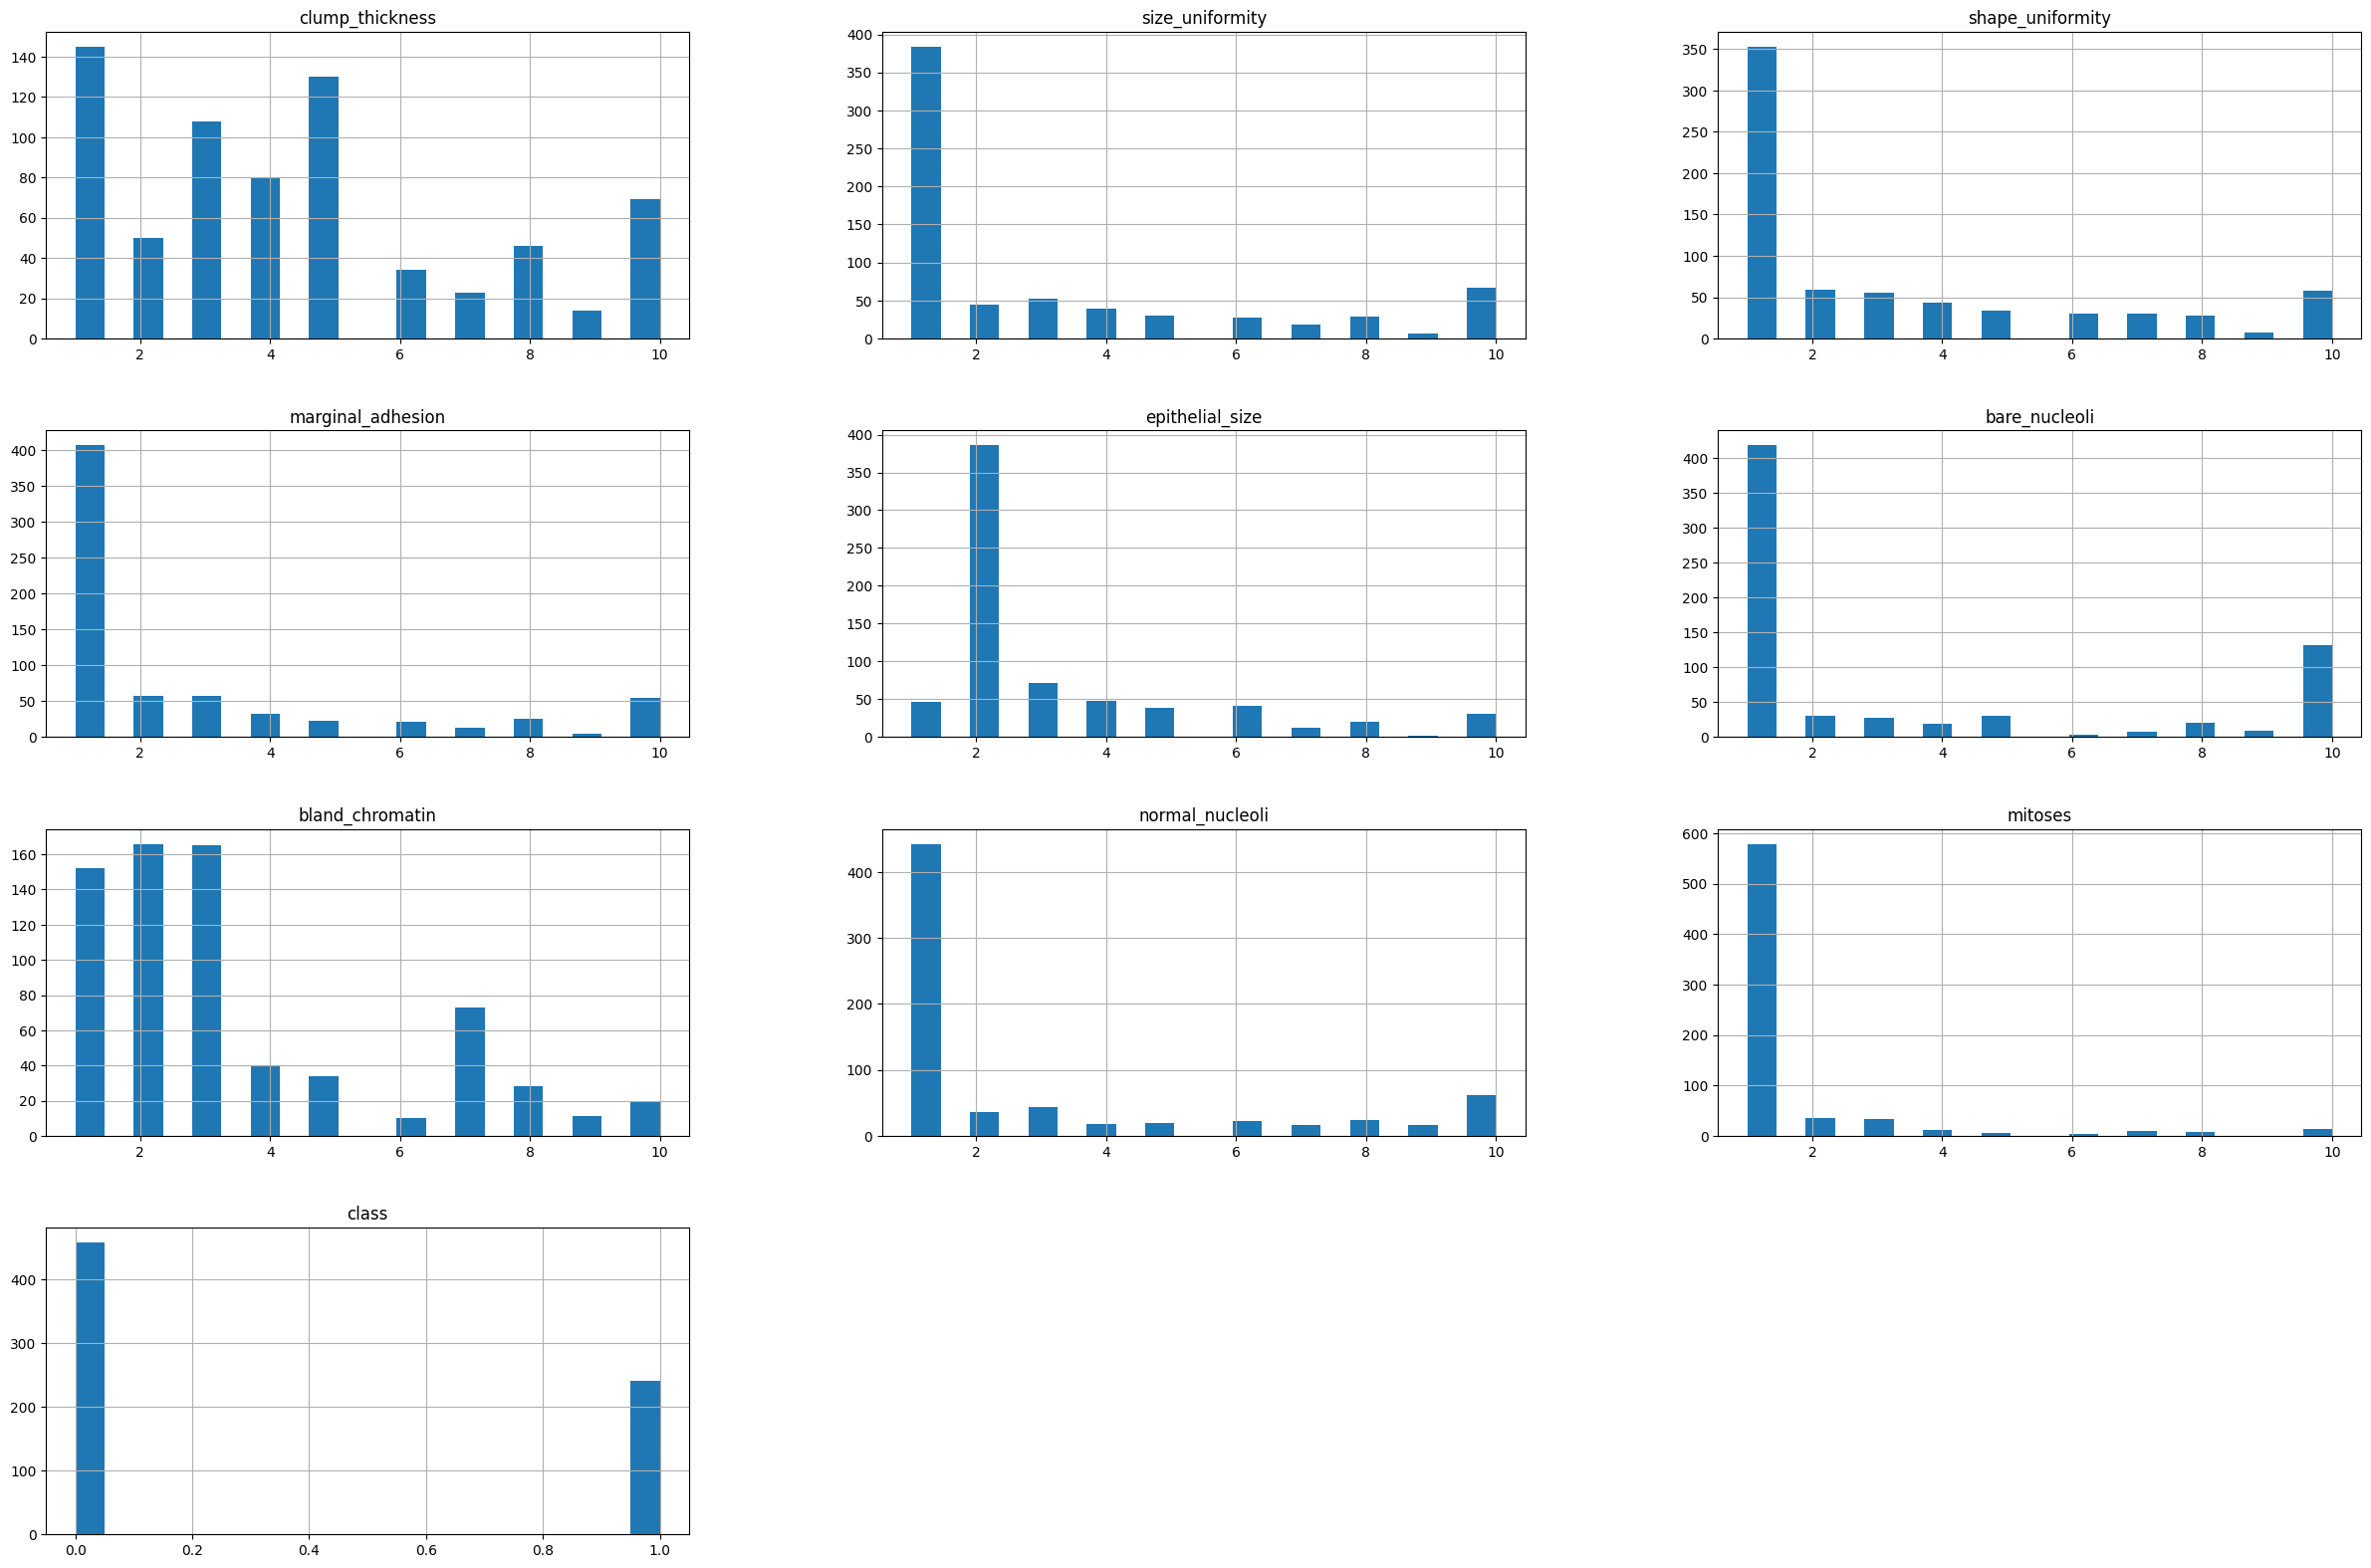

In [356]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

From the above graphs, we can see that most of the  features are right skewed

# **Let's See the Correlation among these attributes**

In [357]:

df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


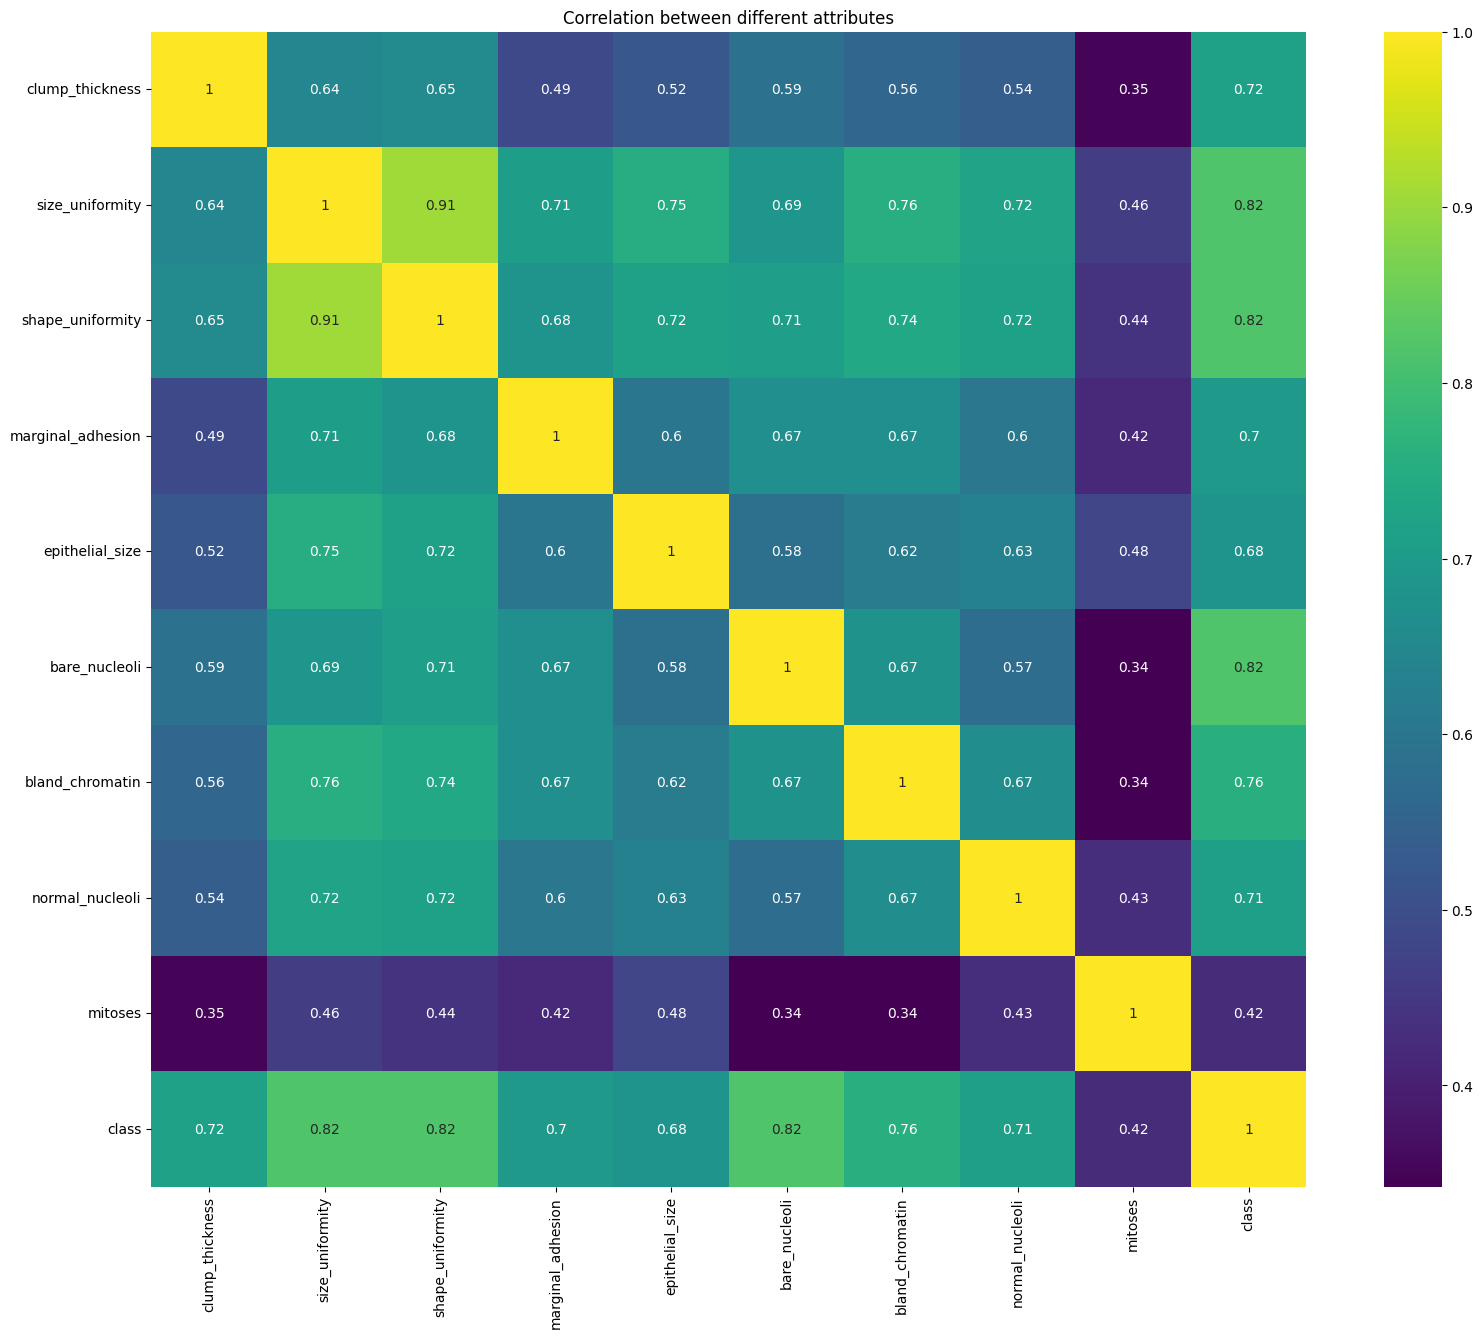

In [358]:

#Heatmap of the correlation between the indepent attributes

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<Figure size 2000x1500 with 0 Axes>

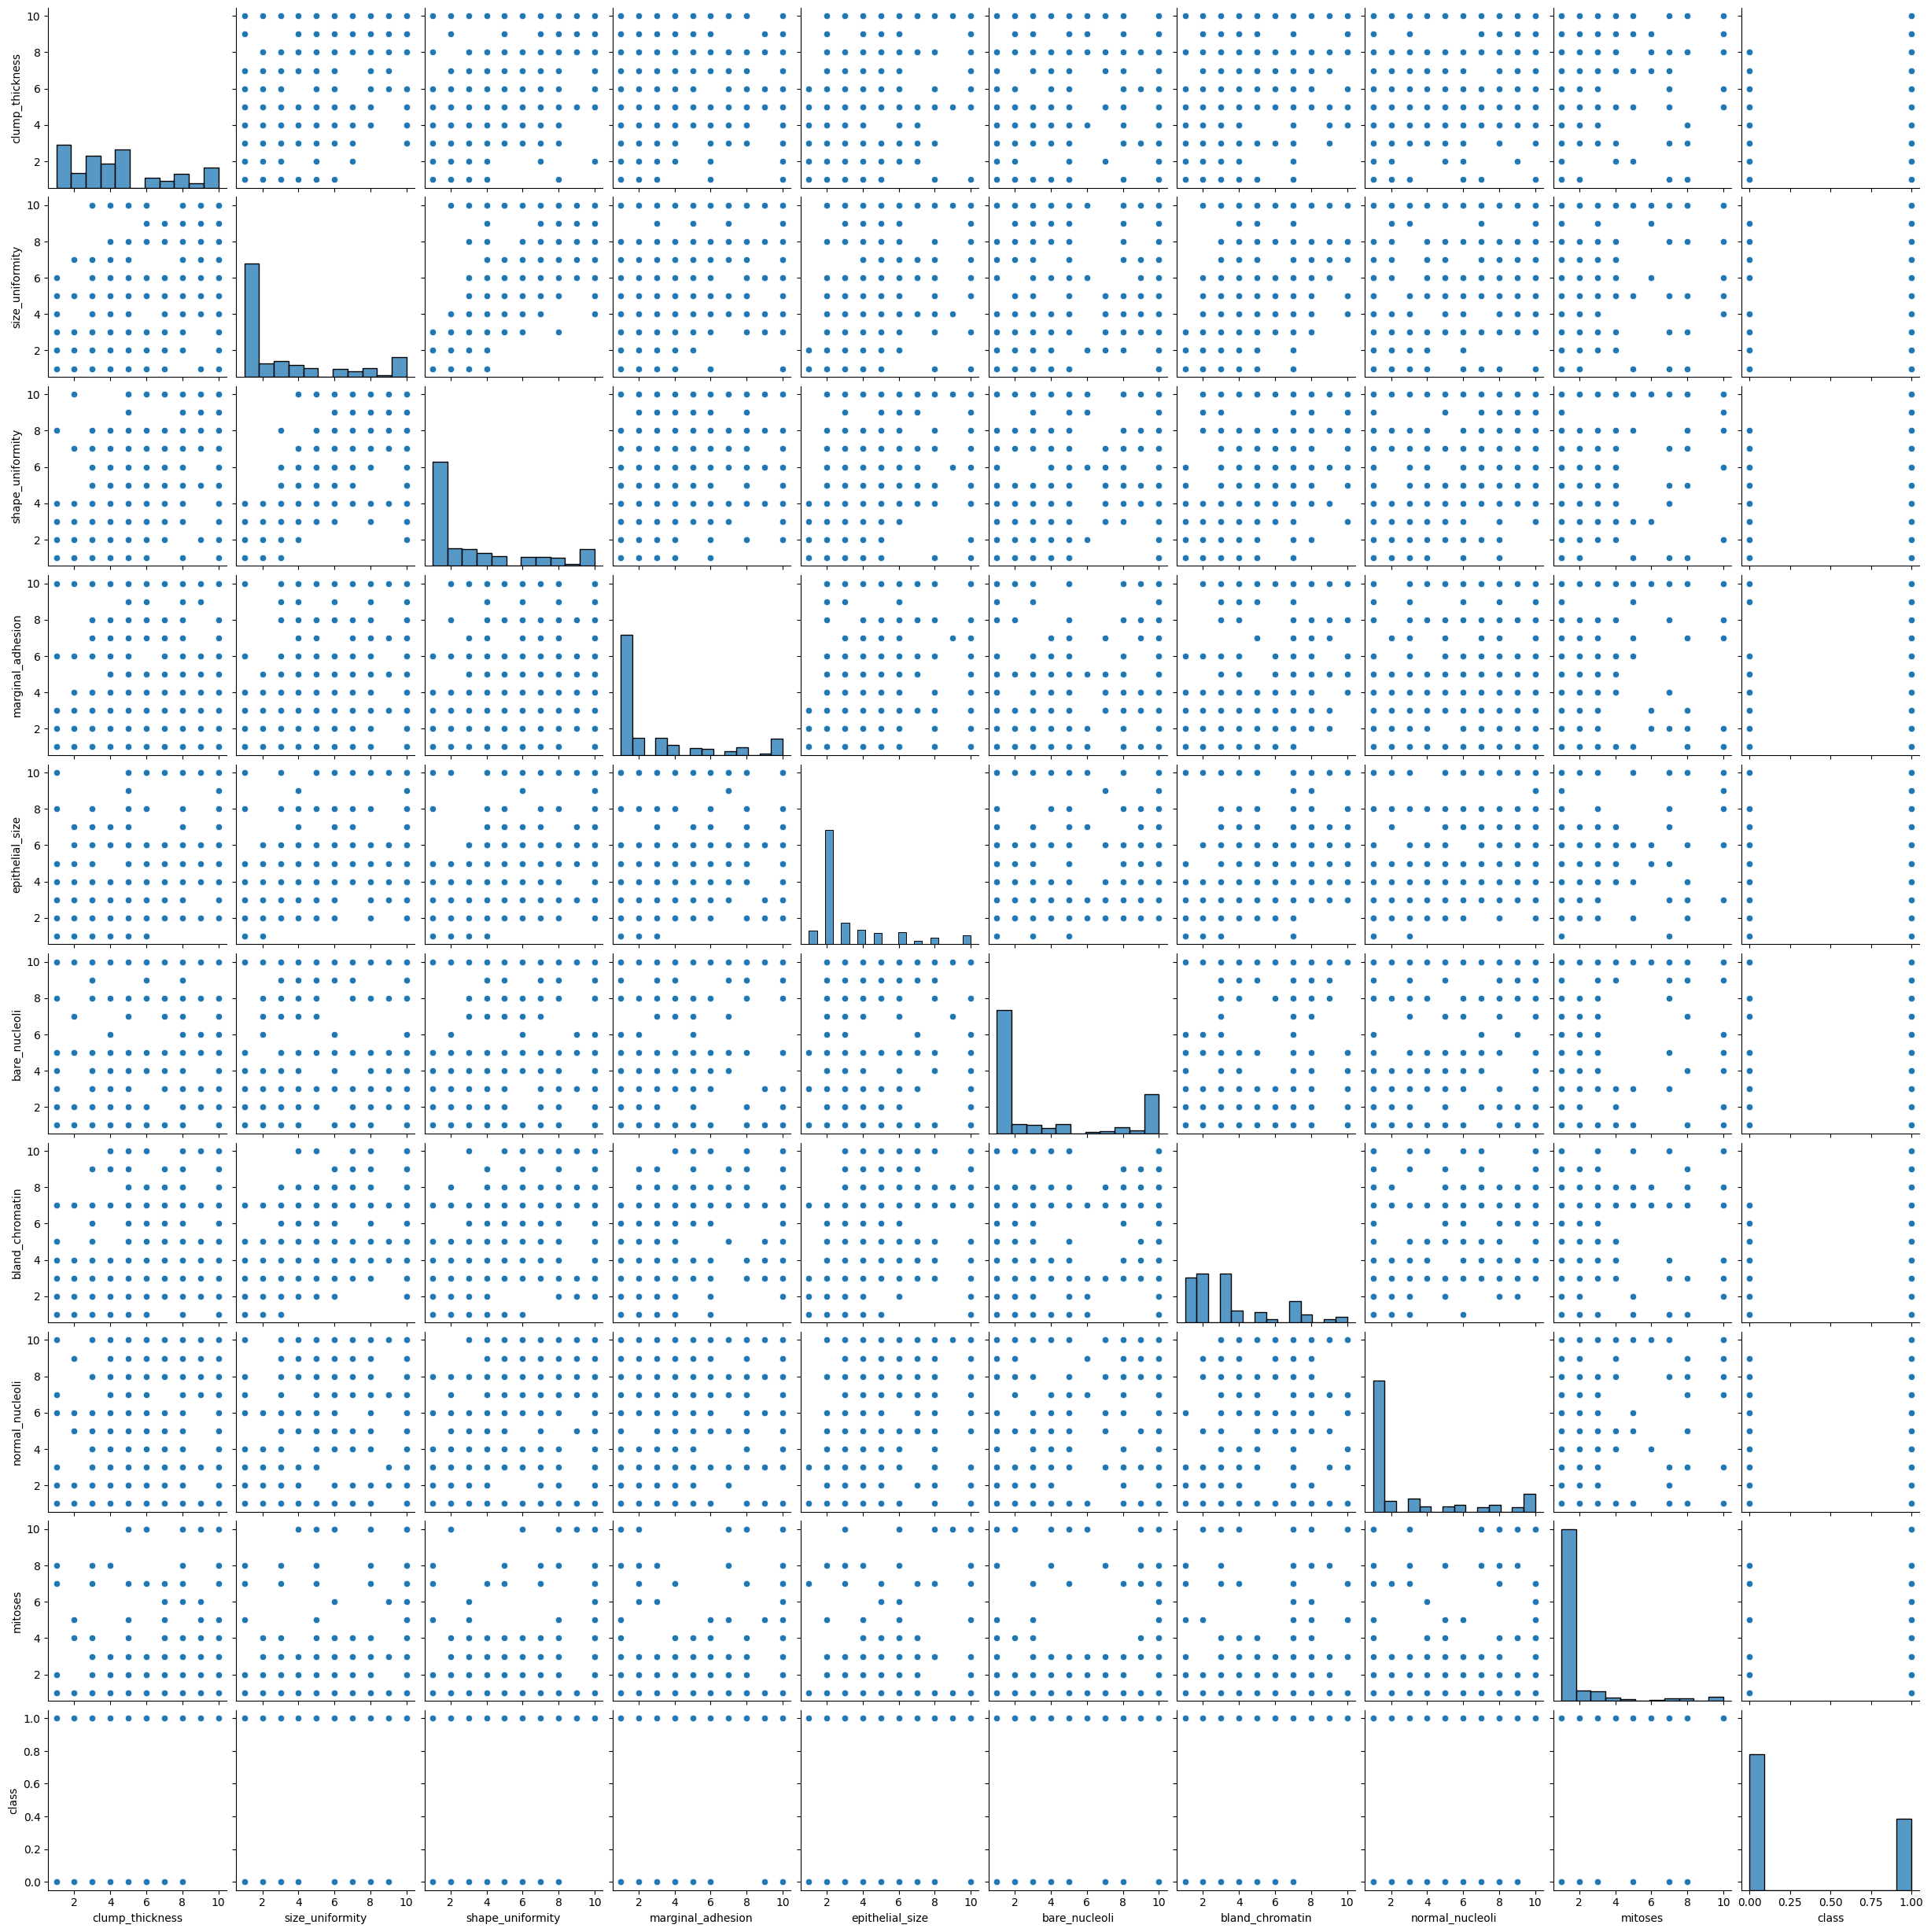

In [359]:

#Pairplot of the correlation/distribution between various independent attributes
plt.figure(figsize=(20,15))
sns.pairplot(df, diag_kind="hist")

<br>


#**Here We Start To Build Our Model**

In [360]:

# Dividing our dataset into training and testing set

X = df.drop('class', axis=1)  #selecting all the attributes except the class attribute
y = df['class'] #selecting class attribute.

In [361]:
#Splitting our data into 70:30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#**KNeighborsClassifier**

In [362]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [363]:

# Call Nearest Neighbour algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [364]:
X_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
584,5,1,1,6,3,1,1,1,1
417,1,1,1,1,2,1,2,1,1
606,4,1,1,2,2,1,1,1,1
349,4,2,3,5,3,8,7,6,1
134,3,1,1,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...
440,10,4,3,10,4,10,10,1,1
299,9,1,2,6,4,10,7,7,2
577,1,1,1,1,2,1,2,1,1
103,8,2,3,1,6,3,7,1,1


In [365]:

predicted_1 = KNN.predict(X_test)
predicted_1

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [366]:
from scipy.stats import zscore

print('KNeighborsClassifier Agorithm is predicting at {0:.2g}%'.format(KNN.score(X_test, y_test)*100))


KNeighborsClassifier Agorithm is predicting at 98%


Confusion Matrix For KNeighborsClassifier


<Axes: >

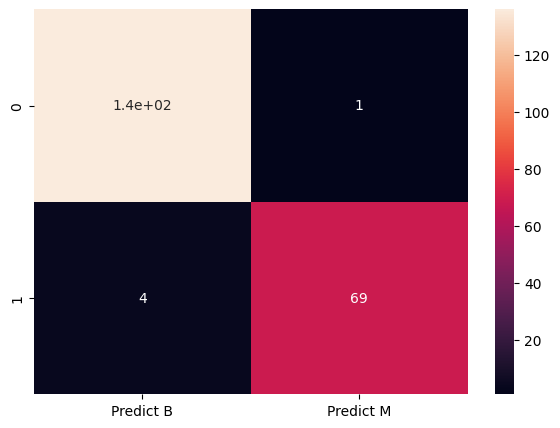

In [367]:
from sklearn import metrics

print("Confusion Matrix For KNeighborsClassifier")
cm=metrics.confusion_matrix(y_test, predicted_1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict B","Predict M"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# **RandomForestClassifier**

In [368]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf = rf.fit(X_train, y_train)

In [369]:
X_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
584,5,1,1,6,3,1,1,1,1
417,1,1,1,1,2,1,2,1,1
606,4,1,1,2,2,1,1,1,1
349,4,2,3,5,3,8,7,6,1
134,3,1,1,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...
440,10,4,3,10,4,10,10,1,1
299,9,1,2,6,4,10,7,7,2
577,1,1,1,1,2,1,2,1,1
103,8,2,3,1,6,3,7,1,1


In [370]:
predicted_3 = rf.predict(X_test)
predicted_3

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [371]:

print('RandomForestClassifier Agorithm is predicting at {0:.2g}%'.format(rf.score(X_test, y_test)*100))

RandomForestClassifier Agorithm is predicting at 97%


Confusion Matrix For RandomForestClassifier


<Axes: >

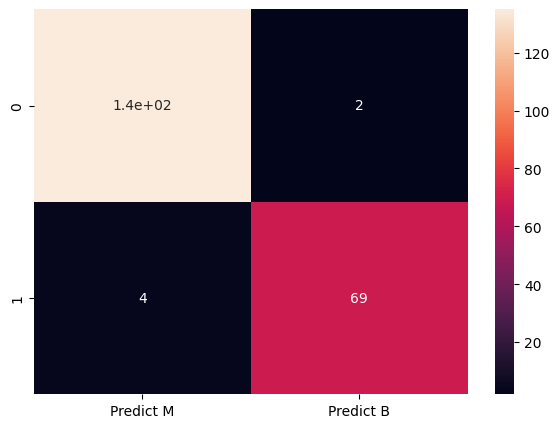

In [372]:
print("Confusion Matrix For RandomForestClassifier")
cm=metrics.confusion_matrix(y_test, predicted_3, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# **Support Vector Machine**

In [373]:
from sklearn.svm import SVC


svc= SVC(gamma=0.025, C=3, kernel='linear')
svc.fit(X_train, y_train)

SVC(C=3, gamma=0.025, kernel='linear')

In [374]:
X_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
584,5,1,1,6,3,1,1,1,1
417,1,1,1,1,2,1,2,1,1
606,4,1,1,2,2,1,1,1,1
349,4,2,3,5,3,8,7,6,1
134,3,1,1,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...
440,10,4,3,10,4,10,10,1,1
299,9,1,2,6,4,10,7,7,2
577,1,1,1,1,2,1,2,1,1
103,8,2,3,1,6,3,7,1,1


In [375]:
predicted_2 = svc.predict(X_test)
predicted_2

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [376]:
print('SupportVectorClassifier Agorithm is predicting at {0:.2g}%'.format(svc.score(X_test, y_test)*100))

SupportVectorClassifier Agorithm is predicting at 97%


Confusion Matrix For SupportVectorMachine


<Axes: >

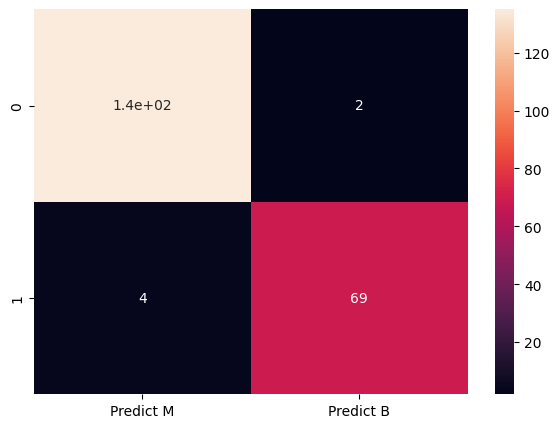

In [377]:
print("Confusion Matrix For SupportVectorMachine")
cm=metrics.confusion_matrix(y_test, predicted_2, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#**Representing All The Models In A Tabular Form**

In [378]:
knnPredictions=pd.DataFrame(predicted_1)
svcPredictions=pd.DataFrame(predicted_2)
rfPredictions=pd.DataFrame(predicted_3)

In [379]:

df1=pd.concat([knnPredictions,svcPredictions,rfPredictions],axis=1)

In [380]:
df1.columns=[['knnPredictions','svcPredictions','rfPredictions']]

In [381]:
df1

,knnPredictions,svcPredictions,rfPredictions
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0
...,...,...,...
205,1,1,1
206,1,1,1
207,0,0,0
208,0,1,1


###**Feature Importance**

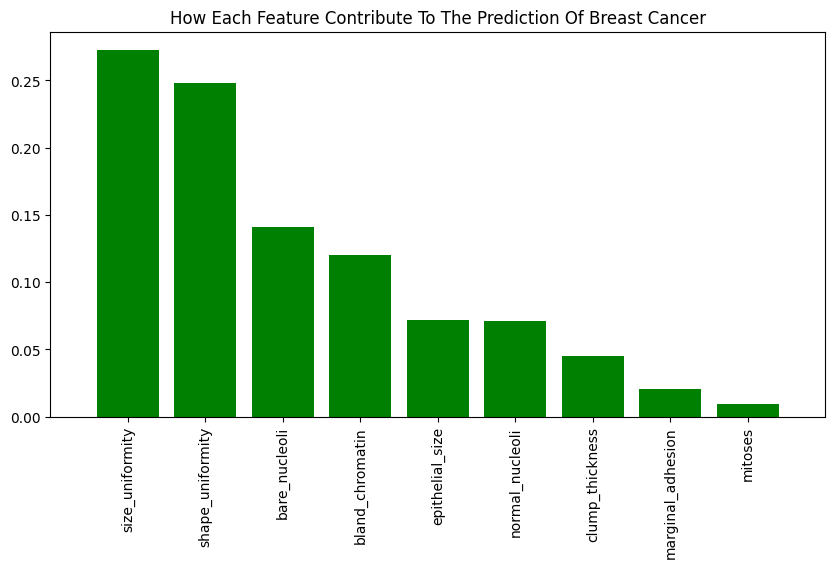

In [382]:
plt.figure(1, figsize=(10, 5))
plt.title("How Each Feature Contribute To The Prediction Of Breast Cancer")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g",  align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [383]:

df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [384]:
minimum_value = df['mitoses'].min()
maximum_value = df['mitoses'].max()

print("Minimum value:", minimum_value)
print("Maximum value:", maximum_value)

Minimum value: 1
Maximum value: 10


In [385]:
df.columns

Index(['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [386]:
df.dtypes

clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [387]:
df.shape

(699, 10)

In [388]:

df.to_csv(r'BreastCancer_dp.csv', index=False)

# **Here we standardize each input from the user**

In [389]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [390]:
import pickle

# Creating a pickle file for the classifier
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Creating a pickle file for the classifier
pickle.dump(KNN, open('model.pkl', 'wb'))